<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 8: Neurons, Shallow Neural Networks </h1>
    <h3></h3>
</center>

## <center> Case: MNIST Example

## Coding section
### Abstract:

<font face="Times New Roman">Consider the classification problem of the MNIST dataset.</font>

<font face="Times New Roman">1. Data processing: We load the MNIST dataset.</font>

<font face="Times New Roman">2. Model training and prediction: We develop an ANN with input layer, hidden layer, and output layer based on PyTorch architecture and train it. Calculate the accuracy to evaluate the performance of these models.</font>
    
<font face="Times New Roman">3. Visualizing results: (1) Confusion Matrix. (2) Training accuracy and loss. </font>

### Problem Description:
    
<font face="Times New Roman">Implement an ANN with input layer, hidden layer, and output layer based on PyTorch architecture to classify MNIST datasets.


### 1. Data processing

In [1]:
# Load packages
from torchvision.datasets import MNIST # pip install torchvision
from torchvision.transforms import Compose,ToTensor,Normalize
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import os
import torch
import numpy as np
import matplotlib.pyplot as plt  

torch.manual_seed(42)

In [7]:
# Set the batch size and the test size
BATCH_SIZE = 100
TEST_BATCH_SIZE = 1000

#Prepare the dataset
def get_dataloader(train,batch_size=BATCH_SIZE):
    transform_fn = Compose([
        ToTensor(),
        Normalize(mean = (0.1307,),std = (0.3081,))
        ])
    
    dataset = MNIST(root = './data', train = train, transform = transform_fn)  # download=True
    data_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True)
    
    return data_loader

### 2. Model training and prediction
Fill in the blanks.

In [8]:
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel,self).__init__() 
        self.fc1 = nn.Linear(1*28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        # Fill in the blanks.
 
    def forward(self,input):
        # Fill in the blanks.
        x = input.view([-1,1*28*28])
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        out = self.fc3(x)
        return out

In [9]:
model = MnistModel()

# Fill in the blanks.
Criterion = nn.CrossEntropyLoss()
Optimizer = Adam(model.parameters(), lr=0.001)



In [10]:
train_acc_list = []
train_loss_list = []
def train(epoch):  #Epoch represents the number of training epochs
    
    data_loader = get_dataloader(True)  #Get Data Loader
    
    for idx,(input,target) in enumerate(data_loader):
        
        # Fill in the blanks.
        for idx,(input,targeet) in enumerate(data_loader):
            Optimizer.zero_grad()
            output = model(input)
            loss = Criterion(output, target)
            loss.backward()
            Optimizer.step()

            pred = output.max(dim = -1)[1]
            cur_acc = pred.eq(target).float().mean()
        
        if idx % 100 == 0:
            print("Epoch：",epoch, "  Batch：", idx, "  Loss：", loss.item())
            train_acc_list.append(cur_acc.item())
            train_loss_list.append(loss.item())

In [ ]:
for i in range(10):  #Train 10 epochs
    train(i)

In [ ]:
def test():
    loss_list = []
    acc_list = []
    pred_list = []
    target_list = []
    
    test_dataloader = get_dataloader(train = False, batch_size=TEST_BATCH_SIZE)
    for idx,(input,target) in enumerate(test_dataloader):
        target_list.append(target.view(-1).tolist())
        
        with torch.no_grad(): #Do not calculate gradients
            # Fill in the blanks.
            output = model(input)
            cur_loss = Criterion(output, target)
            loss_list.append(cur_loss.item())

            pred = output.max(dim = -1)[1]
            pred_list.append(pred.view(-1).tolist())
            cur_acc = pred.eq(target).float().mean()
            acc_list.append(cur_acc)
            
    print("平均准确率：", np.mean(acc_list),"  平均损失：", np.mean(loss_list))
    
    pred_arr = np.array(pred_list).flatten()
    target_arr = np.array(target_list).flatten()
    return pred_arr, target_arr

In [8]:
y_pred, y_test = test()

平均准确率： 0.9788   平均损失： 0.088019386


### 3. Visualizing results

### 3.1 Confusion Matrix

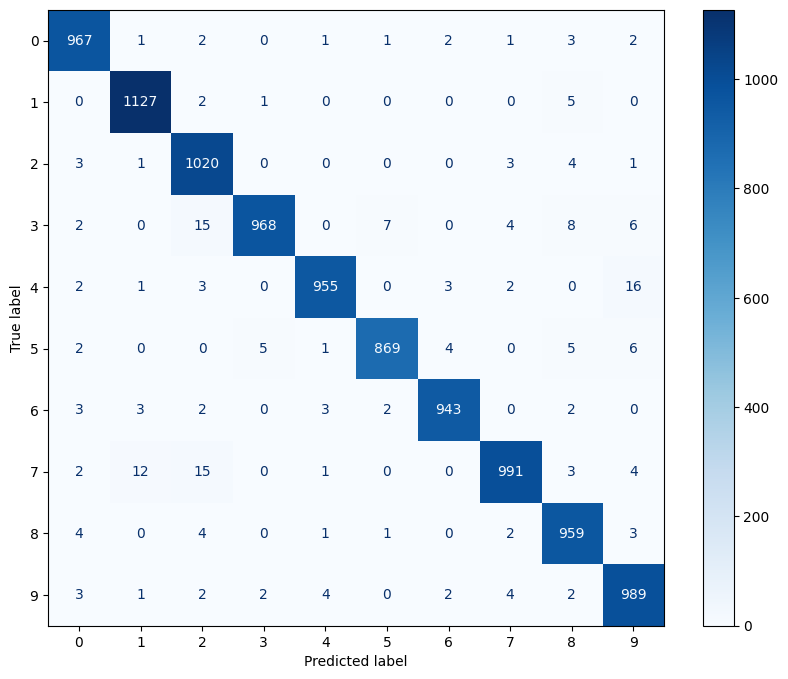

In [ ]:
# Load Python packages for Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix
# Fill in the blanks.
fig,ax = plt.subplots(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred,labels=np.arange(0,10,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(0,10,1))
disp.plot(cmap='Blues', ax=ax)
plt.show()


### 3.2 Plot the Training accuracy and loss

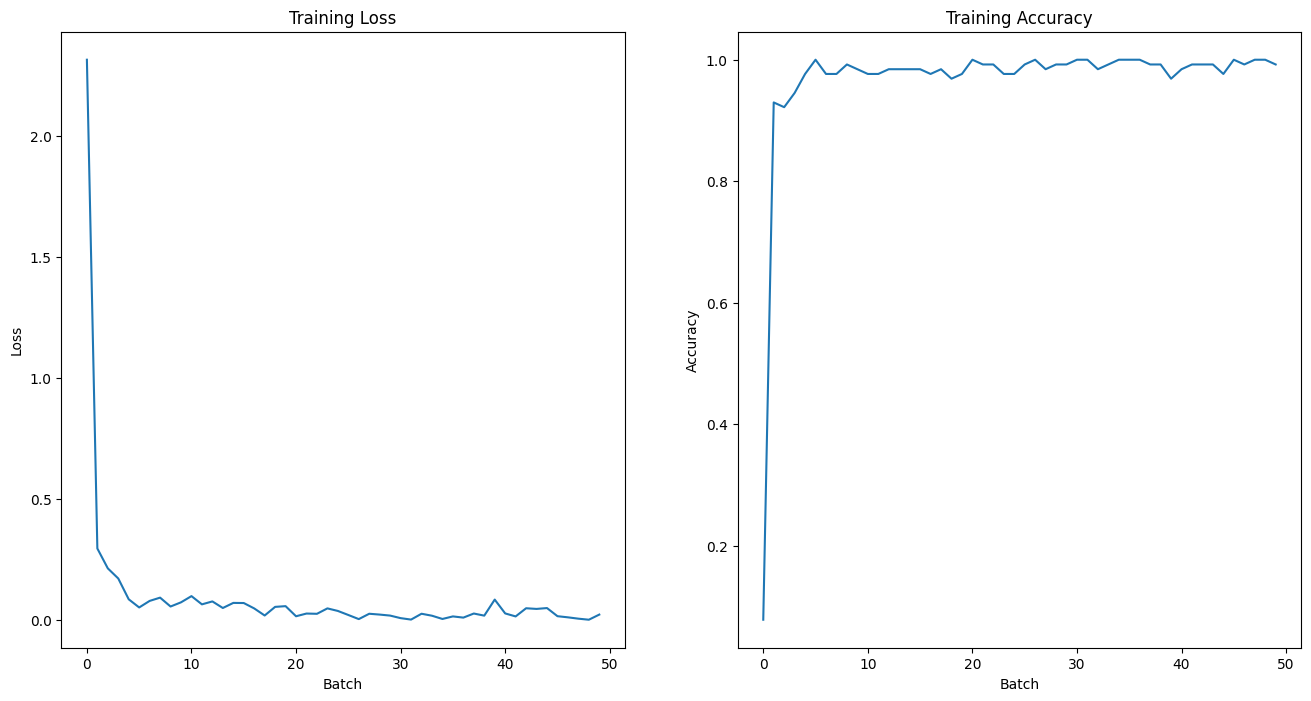

In [ ]:
# Fill in the blanks.
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(train_loss_list)
plt.title('Training Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_acc_list)
plt.title('Training Accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy')

plt.show()

torch.Size([128, 1, 28, 28])


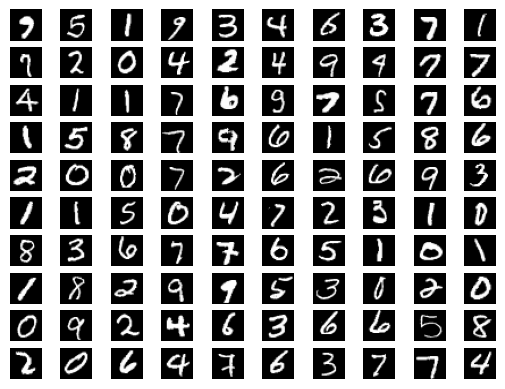

In [11]:
data_loader = get_dataloader(True)

for idx,(input,target) in enumerate(data_loader):
    print(input.shape)
    
    #Display the top 100 images
    for i in range(100):
        plt.subplot(10, 10, i+1)
        plt.imshow(input[i,0,:,:], cmap="gray")
        plt.axis('off') # Turn off the coordinate axis

    break     
plt.show() 